### EDA of Owid Data 

### 1. Importing and preparing data 

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

file = 'owid-covid-data.csv'

owid_df = pd.read_csv(file, sep =',', usecols = [2,3,34,35,36,37,38,39,40,41,42,
                                                  43,44,46],)
owid_df.head(5)

,location,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,population
0,Afghanistan,2020-02-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0
1,Afghanistan,2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0
2,Afghanistan,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0
3,Afghanistan,2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0
4,Afghanistan,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0


In [49]:
owid_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118134 entries, 0 to 118133
Data columns (total 14 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   location                               118134 non-null  object 
 1   date                                   118134 non-null  object 
 2   total_vaccinations                     26180 non-null   float64
 3   people_vaccinated                      25042 non-null   float64
 4   people_fully_vaccinated                22031 non-null   float64
 5   total_boosters                         2345 non-null    float64
 6   new_vaccinations                       21696 non-null   float64
 7   new_vaccinations_smoothed              46739 non-null   float64
 8   total_vaccinations_per_hundred         26180 non-null   float64
 9   people_vaccinated_per_hundred          25042 non-null   float64
 10  people_fully_vaccinated_per_hundred    22031 non-null   

In [50]:
owid_df1 = owid_df.loc[owid_df['location'] =='United Kingdom'].copy()

owid_df1.info(verbose = True)

owid_df_UK = owid_df1.drop(['total_boosters', 'total_boosters_per_hundred'], axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599 entries, 111358 to 111956
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location                               599 non-null    object 
 1   date                                   599 non-null    object 
 2   total_vaccinations                     257 non-null    float64
 3   people_vaccinated                      257 non-null    float64
 4   people_fully_vaccinated                253 non-null    float64
 5   total_boosters                         0 non-null      float64
 6   new_vaccinations                       252 non-null    float64
 7   new_vaccinations_smoothed              280 non-null    float64
 8   total_vaccinations_per_hundred         257 non-null    float64
 9   people_vaccinated_per_hundred          257 non-null    float64
 10  people_fully_vaccinated_per_hundred    253 non-null    float64
 11

In [51]:
owid_df_UK = owid_df_UK.dropna(subset = ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated'], how='all')

owid_df_UK.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257 entries, 111675 to 111955
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location                               257 non-null    object 
 1   date                                   257 non-null    object 
 2   total_vaccinations                     257 non-null    float64
 3   people_vaccinated                      257 non-null    float64
 4   people_fully_vaccinated                253 non-null    float64
 5   new_vaccinations                       252 non-null    float64
 6   new_vaccinations_smoothed              256 non-null    float64
 7   total_vaccinations_per_hundred         257 non-null    float64
 8   people_vaccinated_per_hundred          257 non-null    float64
 9   people_fully_vaccinated_per_hundred    253 non-null    float64
 10  new_vaccinations_smoothed_per_million  256 non-null    float64
 11

In [52]:
owid_df_UK.head(5)

,location,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,population
111675,United Kingdom,2020-12-13,86465.0,86465.0,NaN,NaN,NaN,0.13,0.13,NaN,NaN,68207114.0
111682,United Kingdom,2020-12-20,675286.0,675286.0,NaN,NaN,84117.0,0.99,0.99,NaN,1233.0,68207114.0
111689,United Kingdom,2020-12-27,1005073.0,1005073.0,NaN,NaN,47112.0,1.47,1.47,NaN,691.0,68207114.0
111696,United Kingdom,2021-01-03,1380430.0,1380430.0,NaN,NaN,53622.0,2.02,2.02,NaN,786.0,68207114.0
111703,United Kingdom,2021-01-10,2677971.0,2286572.0,391399.0,NaN,185363.0,3.93,3.35,0.57,2718.0,68207114.0


In [61]:
owid_df_UK1 = owid_df_UK.drop(['location', 'date', 'new_vaccinations', 'new_vaccinations_smoothed', 
                               'new_vaccinations_smoothed_per_million', 'population'], axis=1)


owid_df_UK1.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257 entries, 111675 to 111955
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   total_vaccinations                   257 non-null    float64
 1   people_vaccinated                    257 non-null    float64
 2   people_fully_vaccinated              253 non-null    float64
 3   total_vaccinations_per_hundred       257 non-null    float64
 4   people_vaccinated_per_hundred        257 non-null    float64
 5   people_fully_vaccinated_per_hundred  253 non-null    float64
dtypes: float64(6)
memory usage: 14.1 KB


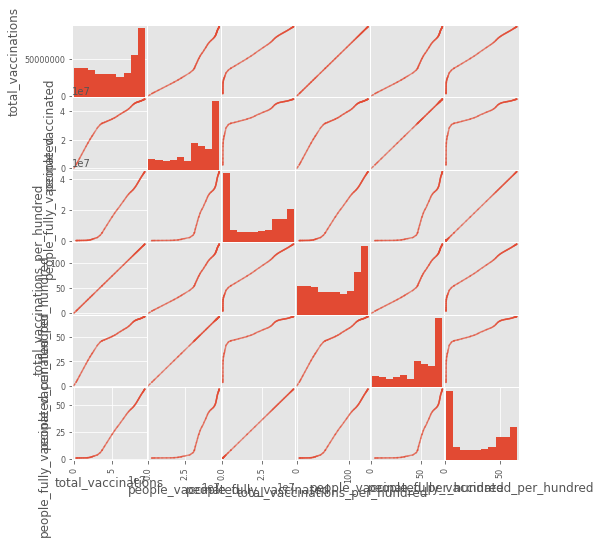

In [60]:
_= pd.plotting.scatter_matrix(owid_df_UK1, figsize = [8,8], s = 10)

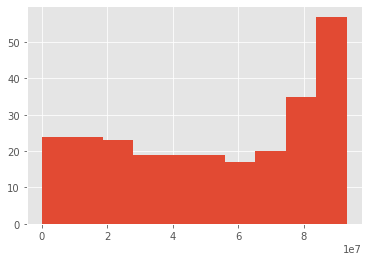

In [62]:
import seaborn as sns

_ = plt.hist(owid_df_UK1['total_vaccinations'])

In [63]:
def ECDF(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,len(x)+1)/n
    return x,y

In [70]:
x1,y1 = ECDF(owid_df_UK1['total_vaccinations'])
x2,y2 = ECDF(owid_df_UK1['people_vaccinated'])
x3,y3 = ECDF(owid_df_UK1['people_fully_vaccinated'])

x4,y4 = ECDF(owid_df_UK1['people_vaccinated_per_hundred'])
x5,y5 = ECDF(owid_df_UK1['people_fully_vaccinated_per_hundred'])

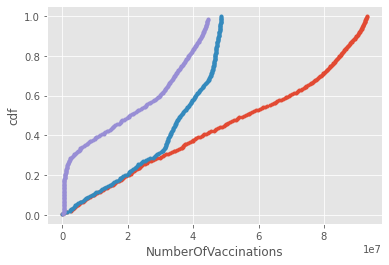

In [83]:
_= plt.plot(x1,y1,marker = '.', linestyle = 'none')    #red
_= plt.plot(x2,y2,marker = '.', linestyle = 'none')     #blue
_= plt.plot(x3,y3,marker = '.', linestyle = 'none')     #purple

plt.xlabel('NumberOfVaccinations')
plt.ylabel('cdf')
plt.show()

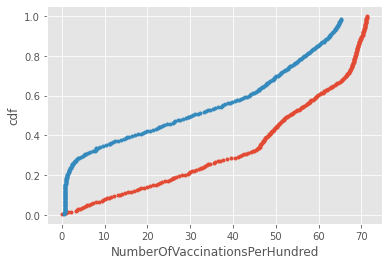

In [86]:
_= plt.plot(x4,y4,marker = '.', linestyle = 'none')     #black
_= plt.plot(x5,y5,marker = '.', linestyle = 'none')     #yellow

plt.xlabel('NumberOfVaccinationsPerHundred')
plt.ylabel('cdf')
plt.show()

In [87]:
data1 = owid_df_UK1['total_vaccinations_per_hundred']
data2 = owid_df_UK1['people_fully_vaccinated_per_hundred']
print(data1)
print(data2)

111675      0.13
111682      0.99
111689      1.47
111696      2.02
111703      3.93
           ...  
111951    135.97
111952    136.10
111953    136.22
111954    136.36
111955    136.44
Name: total_vaccinations_per_hundred, Length: 257, dtype: float64
111675      NaN
111682      NaN
111689      NaN
111696      NaN
111703     0.57
          ...  
111951    64.85
111952    64.95
111953    65.04
111954    65.14
111955    65.19
Name: people_fully_vaccinated_per_hundred, Length: 257, dtype: float64


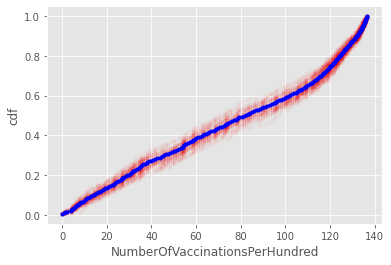

In [95]:
for i in range(50):
    bs_sample = np.random.choice(data1, size = len(data1))
    x,y = ECDF(bs_sample)
    plt.plot(x,y,marker = '.', linestyle = 'none', color = 'red', alpha = 0.01)
x,y = ECDF(data1)
plt.plot(x,y,marker = '.', color = 'blue')
plt.xlabel('NumberOfVaccinationsPerHundred')
plt.ylabel('cdf') 
plt.show()

In [97]:
def boot_replica(data,func):
    bs_sample = np.random.choice(data, len(data1))
    return func(bs_sample)

def draw_bs_rep(data, func, size = 1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = boot_replica(data,func)
        return bs_replicates

In [98]:
bs_replicates = draw_bs_rep(data1, np.mean,10000)
StandardError = np.std(data1)/np.sqrt(len(data1))
print(StandardError)

2.7352095727570984


In [99]:
bs_std = np.std(bs_replicates)
print(bs_std)

0.7729741888585885
